In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/baseline/train.csv')#,index=False)
df

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,out,0,2,2,0,2,0,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,out,0,0,0,3,0,3,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,out,0,4,4,4,4,5,4,4,5,...,5,5,6,5,6,6,6,5,6,4
3,out,0,6,5,5,6,5,6,6,5,...,6,6,7,7,5,6,5,5,7,7
4,out,0,3,0,0,3,0,0,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,noise,0,5,6,6,23,15,7,10,15,...,8,7,7,7,7,7,6,7,6,7
33596,noise,0,3,3,3,2,3,3,3,3,...,3,5,5,5,5,3,3,3,3,3
33597,noise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,0,0,3
33598,noise,0,8,7,7,5,8,8,8,8,...,8,10,8,8,10,10,7,7,7,5


In [4]:
# 옥외누수(out), 옥내누수(in), 정상(normal), 전기/기계음(noise), 환경음(other)

df['class']=0
df.loc[df['leaktype'] == 'out','class']=0
df.loc[df['leaktype'] == 'in','class']=1
df.loc[df['leaktype'] == 'normal','class']=2
df.loc[df['leaktype'] == 'noise','class']=3
df.loc[df['leaktype'] == 'other','class']=4
df

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ,class
0,out,0,2,2,0,2,0,2,2,2,...,5,2,2,5,2,2,5,2,5,0
1,out,0,0,0,3,0,3,0,0,0,...,3,3,3,3,3,3,3,3,6,0
2,out,0,4,4,4,4,5,4,4,5,...,5,6,5,6,6,6,5,6,4,0
3,out,0,6,5,5,6,5,6,6,5,...,6,7,7,5,6,5,5,7,7,0
4,out,0,3,0,0,3,0,0,3,3,...,3,3,3,3,3,3,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,noise,0,5,6,6,23,15,7,10,15,...,7,7,7,7,7,6,7,6,7,3
33596,noise,0,3,3,3,2,3,3,3,3,...,5,5,5,5,3,3,3,3,3,3
33597,noise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,3,0,0,3,3
33598,noise,0,8,7,7,5,8,8,8,8,...,10,8,8,10,10,7,7,7,5,3


In [5]:
x = df[df.columns[1:514].to_list()]
x

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,0,2,2,0,2,0,2,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,0,0,0,3,0,3,0,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,0,4,4,4,4,5,4,4,5,5,...,5,5,6,5,6,6,6,5,6,4
3,0,6,5,5,6,5,6,6,5,5,...,6,6,7,7,5,6,5,5,7,7
4,0,3,0,0,3,0,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,8,7,7,7,7,7,6,7,6,7
33596,0,3,3,3,2,3,3,3,3,7,...,3,5,5,5,5,3,3,3,3,3
33597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,0,0,3
33598,0,8,7,7,5,8,8,8,8,7,...,8,10,8,8,10,10,7,7,7,5


In [6]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [7]:
np.eye(5)[3]

array([0., 0., 0., 1., 0.])

In [8]:
y = df[df.columns[-1:].to_list()]
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
33595,3
33596,3
33597,3
33598,3


In [9]:
yy = y['class'].map(lambda x:np.eye(5)[x])

In [10]:
yy = np.vstack(yy)

In [11]:
print(type(yy))

<class 'numpy.ndarray'>


In [12]:
np.shape(yy)

(33600, 5)

In [13]:
np.shape(x)

(33600, 513)

In [14]:
x.shape

(33600, 513)

In [15]:
[x.shape, np.newaxis]

[(33600, 513), None]

In [16]:
x = np.expand_dims(x, axis=-1)

In [17]:
x.shape

(33600, 513, 1)

In [18]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, Activation
#from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



# x = df[df.columns[1:].to_list()]
# y = df[df.columns[-1:].to_list()]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, yy, test_size=0.2, shuffle=True, stratify=None, random_state=100)


#train, val = train_test_split(df, test_size=0.2, random_state=100)

#print(train.shape[0])

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=x_train.shape[1:]))
model.add(LSTM(units = 10, return_sequences = True)) #100

model.add(LSTM(units = 10, return_sequences = True)) #100

model.add(LSTM(units = 10, return_sequences = True)) #100

#model.add(LSTM(units = 10, return_sequences = True,activation ='tanh'))

model.add(LSTM(units = 10, return_sequences = True)) #100

model.add(LSTM(units = 10))

model.add(Dense(units = 5,activation='softmax'))
model.summary()


#print(train)
#print(val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 513, 10)           480       
                                                                 
 lstm_1 (LSTM)               (None, 513, 10)           840       
                                                                 
 lstm_2 (LSTM)               (None, 513, 10)           840       
                                                                 
 lstm_3 (LSTM)               (None, 513, 10)           840       
                                                                 
 lstm_4 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
Total params: 3,895
Trainable params: 3,895
Non-trainabl

In [19]:
#filepath="/content/drive/MyDrive/Colab Notebooks/baseline/weights-improvement-{epoch:02d}.ckpt"#-{val_acc:.2f}
filepath="/content/drive/MyDrive/Colab Notebooks/baseline/LSTM-{epoch:02d}.h5"#-{
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [20]:
x_train.shape, y_train.shape

((26880, 513, 1), (26880, 5))

In [21]:
#model.load_weights('/content/drive/MyDrive/Colab Notebooks/baseline/best_model2_.h5')

In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy']) #'sparse_categorical_crossentropy' categorical_crossentropy
# early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
history = model.fit(x_train,
                    y_train,
                    batch_size=16,
                    epochs=1,
                    validation_steps=5,
                    validation_data=(x_test, y_test),
                    validation_batch_size=16,
                    verbose=2,
                    callbacks=callbacks_list)




Epoch 1: val_loss improved from inf to 0.81805, saving model to /content/drive/MyDrive/Colab Notebooks/baseline/LSTM-01.h5
1680/1680 - 808s - loss: 1.0560 - accuracy: 0.6192 - val_loss: 0.8181 - val_accuracy: 0.7500 - 808s/epoch - 481ms/step


In [23]:
from tensorflow.keras.models import save_model #학습 모델 저장

In [25]:
save_model(model, '/content/drive/MyDrive/Colab Notebooks/baseline/LSTM 5-ray(unit=10),Dense 1-ray, epoch =100_.h5')

In [24]:
#filepath = '//content/drive/MyDrive/Colab Notebooks/baseline/weights-improvement-81.ckpt'
filepath = '/content/drive/MyDrive/Colab Notebooks/baseline/LSTM 5-ray(unit=10),Dense 1-ray, epoch =100_.h5'
model.load_weights(filepath)# Re-evaluate the model
loss,acc = model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


210/210 [==============================] - 30s 131ms/step - loss: 0.6444 - accuracy: 0.7482
Restored model, accuracy: 74.82%


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef

#print(x_test)
pred = model.predict(x_test)
# cm = confusion_matrix(y_test,pred)
# df_cm = pd.DataFrame(cm,index=['normal', 'abnormal'],columns=['normal', 'abnormal'])
# df_cm

In [26]:
pred

array([[9.2561510e-05, 2.0313113e-04, 9.9844438e-01, 1.0808721e-03,
        1.7917524e-04],
       [6.3385924e-05, 1.4444238e-04, 9.9868912e-01, 9.6676050e-04,
        1.3633288e-04],
       [6.6856708e-05, 1.5197699e-04, 9.9865144e-01, 9.8822801e-04,
        1.4160236e-04],
       ...,
       [2.8127083e-01, 1.0725984e-01, 3.1557742e-01, 1.7579786e-02,
        2.7831212e-01],
       [9.9569455e-02, 1.7042890e-01, 7.1589195e-04, 8.8557065e-02,
        6.4072865e-01],
       [6.8119421e-05, 1.5449083e-04, 9.9859768e-01, 1.0298633e-03,
        1.4986837e-04]], dtype=float32)

In [27]:
pred_arg = np.argmax(pred, axis=1)

In [28]:
pred_arg

array([2, 2, 2, ..., 2, 4, 2])

In [29]:
true_arg = np.argmax(y_test, axis=1)

In [30]:
true_arg

array([2, 2, 2, ..., 4, 1, 2])

In [31]:
cm = confusion_matrix(true_arg, pred_arg)
print(cm)

[[  17    1   36   59  222]
 [  13    2   45   56  253]
 [   0    0 3576   18   36]
 [  10    1  118  429  415]
 [  14    2  155  238 1004]]


In [32]:
f1_score(true_arg, pred_arg, average='macro')

0.42573713062401647

In [33]:
accuracy_score(true_arg, pred_arg)

0.7482142857142857

In [34]:
# cm = confusion_matrix(true_arg, pred_arg)
# print(cm)

cm=confusion_matrix(true_arg,pred_arg)
df_cm=pd.DataFrame(cm, index=['out', 'in','normal','noise','other'], columns=['out', 'in','normal','noise','other'])
df_cm 

# df.loc[df['leaktype'] == 'out','class']=0
# df.loc[df['leaktype'] == 'in','class']=1
# df.loc[df['leaktype'] == 'normal','class']=2
# df.loc[df['leaktype'] == 'noise','class']=3
# df.loc[df['leaktype'] == 'other','class']=4

,out,in,normal,noise,other
out,17,1,36,59,222
in,13,2,45,56,253
normal,0,0,3576,18,36
noise,10,1,118,429,415
other,14,2,155,238,1004


In [35]:
df_cm1 = pd.DataFrame(pred_arg, index = true_arg)
df_cm1

,0
2,2
2,2
2,2
2,2
4,4
...,...
2,2
2,2
4,2
1,4


In [36]:
df_cm1.reset_index(inplace=True)
df_cm1

,index,0
0,2,2
1,2,2
2,2,2
3,2,2
4,4,4
...,...,...
6715,2,2
6716,2,2
6717,4,2
6718,1,4


In [37]:
df_cm1.columns

Index(['index', 0], dtype='object')

In [38]:
df_cm1 = df_cm1.rename(columns={'index':'real',0:'pred'})
df_cm1

,real,pred
0,2,2
1,2,2
2,2,2
3,2,2
4,4,4
...,...,...
6715,2,2
6716,2,2
6717,4,2
6718,1,4


In [39]:
#df_cm=pd.DataFrame(cm, index=['out', 'in','normal','noise','other'], columns=['out', 'in','normal','noise','other'])
df_cm                          #0.    1.      2.       3.       4 

,out,in,normal,noise,other
out,17,1,36,59,222
in,13,2,45,56,253
normal,0,0,3576,18,36
noise,10,1,118,429,415
other,14,2,155,238,1004


In [131]:
df_cm2 = df_cm1[df_cm1['pred']==3] 
df_cm2 = df_cm2[df_cm2['real']==0]
print(df_cm2.shape)
df_cm2[:]


(59, 2)


,real,pred
73,0,3
187,0,3
201,0,3
345,0,3
526,0,3
688,0,3
810,0,3
1152,0,3
1240,0,3
1495,0,3


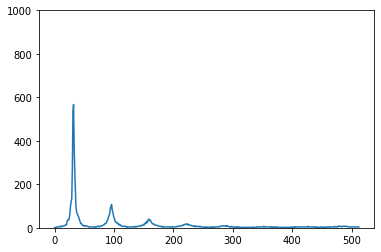

In [133]:
import matplotlib.pyplot as plt
plt.plot(x_test[187])
#plt.xlim([0,10])      # X축의 범위: [xmin, xmax]
plt.ylim([0,1000])     # Y축의 범위: [ymin, ymax]

plt.show()#in ->in

In [ ]:
os.getcwd()

In [ ]:
latest = tf.train.latest_checkpoints('./content/drive/MyDrive/Colab Notebooks/baseline')
model.load_weight(latest)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

pred = x_test